In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
import glob,os
warnings.filterwarnings('ignore')

In [82]:
# MGSW SNP time 0
from scipy.stats import fisher_exact
total_genome = 29864*3
MAL = 0.5
OMSNP = ['A405G','C2790T',' G4184A','C4321T','C8982A','C9344T','A9424G','C9534T','C9866T','C10198T','T10204C','G10447A','C10449A','C12880T',' C15714T','C15738T','T15939C','T16342C','T17124C','C17410T','T17859C','A18163G','A19326G','C19955T','A20055G','C21618T','T21810C',' C22000A','C22109G','T22200A','G22317T','G22577C','G22578A','G22599C','C22664A','C22674T','T22679C','C22686T','A22688G','G22775A','G22813T','T22882G','G22895C','T22896C','G22898A','T22942G','G22992A','A23013C','T23018C','T23019C','T23031C','A23055G','A23063T','T23075C','C23525T','T23599G','C23604A','C23854A','G23948T','A24424T','T24469A','C25000T','C25416T','C25584T','C26060T','C26270T','A26275G','C26577G','G26709A','C26858T','A27259C','G27382C','A27383T','T27384C','C27807T','G27915T','A29510C',
    'C1627T','C2790T',' G4184A','C4321T','C6927T','T6979G','C9344T','A9424G','C9534T','C10198T','G10447A','C10449A','G12160A','C12880T','C15714T','C17410T','A18163G','C19955T','A20055G','C21618T',' T22200G','G22578A','C22674T','T22679C','C22686T','A22688G','G22775A','A22786C','G22813T','T22882G',' G22992A','A23013C','T23018G','A23055G','A23063T','T23075C','C23525T','T23599G','C23604A','C23854A','G23948T','A24424T','T24469A','C25000T','C25584T','C25638T','C26060T','C26270T','G26529A','C26577G','G26709A','C26801T','A27038G','C27807T','C27889T','A28330G','A29510C',
         'C1931A','C2790T','T2954C',' G4184A','C4321T','C9344T','A9424G','C9534T','C10198T','G10447A','C10449A','C11750T','G12160A','C12880T','T14257C','C15714T','G16935A','A17039G','C17410T','A18163G','T18383C','C19955T','A20055G','C21618T',' T22200G','G22578A','G22599C','C22674T','T22679C','C22686T','A22688G','G22775A','A22786C','G22813T','T22882G','A22893C',' T22942A','G22992A','A23013C','T23018G','A23055G','A23063T','T23075C','C23525T','T23599G','C23604A','G23624A','C23854A','G23948T','A24424T','T24469A','C25000T','C25584T','C26060T','C26270T','G26529A','C26577G','G26709A','T26790C','C27807T','C27889T','C28312T','C28603T','G28681T','A29510C']
OMSNP = list(set(OMSNP))
OMoldSNP = ['C241T','T670G','C2790T','C3037T','G4184A','C4321T','C6196T','C9344T','A9424G','C9534T','C9866T','C10029T','C10198T','G10447A','C10449A','C12880T','C14408T','C15714T','C17410T','A18163G','C19955T','A20055G','C21618T','G21987A','T22200G','G22578A','C22674T','T22679C','C22686T','A22688G','G22775A','A22786C','G22813T','T22882G','G22992A','C22995A','A23013C','A23040G','A23055G','A23063T','T23075C','A23403G','C23525T','T23599G','C23604A','C23854A','G23948T','A24424T','T24469A','C25000T','C25584T','C26060T','C26270T','C26577G','G26709A','C26858T','A27259C','G27382C','A27383T','T27384C','C27807T','A28271T','C28311T','G28881T','A29510C']
OMSNP = [x for x in OMSNP if x not in OMoldSNP]
print(len(OMSNP),len(OMoldSNP))
toolset = ['bowtie','minimap','bwa']
VCFerset = ['mappersamtovcf','indel.flt.snp','flt.snp','bcfdefault.flt.snp'] 
allresult = pd.DataFrame()
for tool in toolset:
    for VCFer in VCFerset:
        SNP1 = pd.read_csv('COVID_MGSW/SNP_model/merge/%s/Main_2022_Jan1__ref.fasta.0.SNP.fasta.%s.%s.vcf.final.txt'%(MAL,tool,VCFer),sep='\t')
        SNP2 = pd.read_csv('COVID_MGSW/SNP_model/merge/%s/Main_2022_Jan2__ref.fasta.0.SNP.fasta.%s.%s.vcf.final.txt'%(MAL,tool,VCFer),sep='\t')
        SNP3 = pd.read_csv('COVID_MGSW/SNP_model/merge/%s/Main_2023_Mar1__ref.fasta.0.SNP.fasta.%s.%s.vcf.final.txt'%(MAL,tool,VCFer),sep='\t')
        SNP3new = SNP1#SNP3[~SNP3['POS'].isin(SNP1['POS'])][~SNP3['POS'].isin(SNP2['POS'])]
        SNP3new = SNP3new.append(SNP2)
        print(SNP3new.shape,SNP1.shape)
        SNP3new['SNP']=SNP3new['REF'] + SNP3new['POS'].astype('str') + SNP3new['ALT']
        SNP3new = SNP3new.drop_duplicates('SNP')
        SNP3new['OM'] = 'Non Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMSNP),'OM']='New Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMoldSNP),'OM']='Old Omicron'
        tempresult = pd.DataFrame(
        SNP3new.groupby('OM')['OM'].count()
        )
        tempresult.columns = ['Count']
        tempresult.reset_index(inplace=True)
        tempresult['tool']=tool
        tempresult['VCFer'] = VCFer.replace('mappersamtovcf','QuickVariants').replace('indel.flt.snp','bcftools indel').replace('bcfdefault.flt.snp','bcftools default').replace('flt.snp','bcftools Mul-ALT')
        tempresult['Count total'] = tempresult['Count']
        tempresult.loc[tempresult['OM']=='Old Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='New Omicron','Count total'])[0]
        tempresult.loc[tempresult['OM']=='Non Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='Old Omicron','Count total'])[0]
        NonOM = list(tempresult.loc[tempresult['OM']=='Non Omicron','Count'])[0]
        OM = sum(tempresult.loc[tempresult['OM']!='Non Omicron','Count'])
        data = [[NonOM, OM], [total_genome-NonOM, len(OMSNP)-OM]]
        # Perform Fisher's Exact Test
        odds_ratio, p_value = fisher_exact(data)
        tempresult['Odds']=odds_ratio
        tempresult['pvalue']=p_value
        allresult = allresult.append(tempresult)
allresult.to_csv('COVID_MGSW/SNP_model/merge/SNPsumtime0MAF%s.txt'%(MAL),sep='\t',index=False)
allresult


56 65
(106, 6) (51, 6)
(84, 6) (41, 6)
(84, 6) (41, 6)
(81, 6) (39, 6)
(102, 6) (49, 6)
(71, 6) (34, 6)
(71, 6) (34, 6)
(73, 6) (34, 6)
(102, 6) (49, 6)
(71, 6) (34, 6)
(71, 6) (34, 6)
(71, 6) (35, 6)


,OM,Count,tool,VCFer,Count total,Odds,pvalue
0,New Omicron,1,bowtie,QuickVariants,1,0.000141,8.603998e-104
1,Non Omicron,21,bowtie,QuickVariants,56,0.000141,8.603998e-104
2,Old Omicron,34,bowtie,QuickVariants,35,0.000141,8.603998e-104
0,New Omicron,1,bowtie,bcftools indel,1,0.000100,1.439941e-106
1,Non Omicron,15,bowtie,bcftools indel,50,0.000100,1.439941e-106
2,Old Omicron,34,bowtie,bcftools indel,35,0.000100,1.439941e-106
0,New Omicron,1,bowtie,bcftools Mul-ALT,1,0.000100,1.439941e-106
1,Non Omicron,15,bowtie,bcftools Mul-ALT,50,0.000100,1.439941e-106
2,Old Omicron,34,bowtie,bcftools Mul-ALT,35,0.000100,1.439941e-106
0,New Omicron,1,bowtie,bcftools default,1,0.000101,1.256971e-103


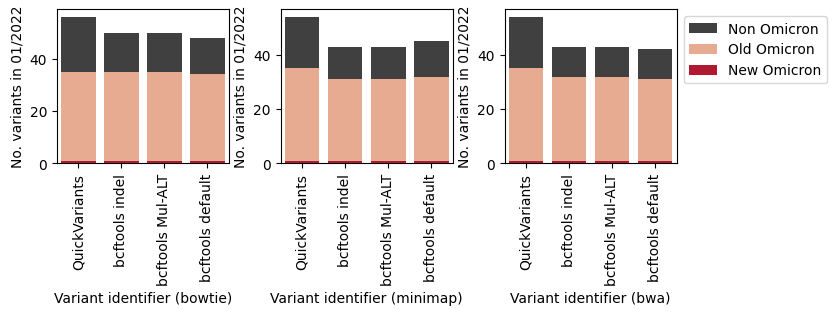

In [83]:
palette_set = {
    'New Omicron':'#ca0020',
    'Old Omicron':'#f4a582',
    'Non Omicron':'#404040',

}
legend_order = [ 'Non Omicron', 'Old Omicron',
                'New Omicron']

fig, axs = plt.subplots(nrows=1,ncols = 3,figsize=(8,2))
fig.subplots_adjust(wspace = 0.3)
for i in range(0,len(toolset)):
    sns.barplot(data = allresult[allresult['tool']==toolset[i]],ax = axs[i],
                x='VCFer',y='Count total',hue='OM',palette=palette_set,dodge=False,hue_order = legend_order)
    axs[i].set_xlabel('Variant identifier (%s)'%(toolset[i])) 
    axs[i].set_ylabel('No. variants in 01/2022')
    plt.sca(axs[i])
    plt.xticks(rotation=90)
    if i < len(toolset):
        axs[i].get_legend().remove()
plt.legend(bbox_to_anchor=(1.0, 1.0))   
plt.savefig('COVID_MGSW/SNP_model/merge/SNPsumtime0MAF%s.pdf'%(MAL))


In [84]:
# MGSW SNP
from scipy.stats import fisher_exact
total_genome = 29864*3
toolset = ['bowtie','minimap','bwa']
VCFerset = ['mappersamtovcf','indel.flt.snp','flt.snp','bcfdefault.flt.snp'] 
allresult = pd.DataFrame()
for tool in toolset:
    for VCFer in VCFerset:
        SNP1 = pd.read_csv('COVID_MGSW/SNP_model/merge/%s/Main_2022_Jan1__ref.fasta.0.SNP.fasta.%s.%s.vcf.final.txt'%(MAL,tool,VCFer),sep='\t')
        SNP2 = pd.read_csv('COVID_MGSW/SNP_model/merge/%s/Main_2022_Jan2__ref.fasta.0.SNP.fasta.%s.%s.vcf.final.txt'%(MAL,tool,VCFer),sep='\t')
        SNP3 = pd.read_csv('COVID_MGSW/SNP_model/merge/%s/Main_2023_Mar1__ref.fasta.0.SNP.fasta.%s.%s.vcf.final.txt'%(MAL,tool,VCFer),sep='\t')
        SNP3new = SNP3[~SNP3['POS'].isin(SNP1['POS'])][~SNP3['POS'].isin(SNP2['POS'])]
        print(SNP3new.shape,SNP3.shape)
        SNP3new['SNP']=SNP3new['REF'] + SNP3new['POS'].astype('str') + SNP3new['ALT']
        SNP3new['OM'] = 'Non Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMSNP),'OM']='New Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMoldSNP),'OM']='Old Omicron'
        tempresult = pd.DataFrame(
        SNP3new.groupby('OM')['OM'].count()
        )
        tempresult.columns = ['Count']
        tempresult.reset_index(inplace=True)
        tempresult['tool']=tool
        tempresult['VCFer'] = VCFer.replace('mappersamtovcf','QuickVariants').replace('indel.flt.snp','bcftools indel').replace('bcfdefault.flt.snp','bcftools default').replace('flt.snp','bcftools Mul-ALT')
        tempresult['Count total'] = tempresult['Count']
        tempresult.loc[tempresult['OM']=='Old Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='New Omicron','Count total'])[0]
        tempresult.loc[tempresult['OM']=='Non Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='Old Omicron','Count total'])[0]
        NonOM = list(tempresult.loc[tempresult['OM']=='Non Omicron','Count'])[0]
        OM = sum(tempresult.loc[tempresult['OM']!='Non Omicron','Count'])
        data = [[NonOM, OM], [total_genome-NonOM, len(OMSNP)-OM]]
        # Perform Fisher's Exact Test
        odds_ratio, p_value = fisher_exact(data)
        tempresult['Odds']=odds_ratio
        tempresult['pvalue']=p_value
        allresult = allresult.append(tempresult)
allresult.to_csv('COVID_MGSW/SNP_model/merge/SNPsumMAF%s.txt'%(MAL),sep='\t',index=False)
allresult


(48, 6) (84, 6)
(45, 6) (81, 6)
(45, 6) (81, 6)
(44, 6) (78, 6)
(48, 6) (84, 6)
(44, 6) (76, 6)
(44, 6) (76, 6)
(43, 6) (76, 6)
(49, 6) (85, 6)
(43, 6) (75, 6)
(43, 6) (75, 6)
(43, 6) (75, 6)


,OM,Count,tool,VCFer,Count total,Odds,pvalue
0,New Omicron,20,bowtie,QuickVariants,20,0.000005,3.407744e-157
1,Non Omicron,2,bowtie,QuickVariants,48,0.000005,3.407744e-157
2,Old Omicron,26,bowtie,QuickVariants,46,0.000005,3.407744e-157
0,New Omicron,18,bowtie,bcftools indel,18,0.000011,1.150033e-140
1,Non Omicron,3,bowtie,bcftools indel,45,0.000011,1.150033e-140
2,Old Omicron,24,bowtie,bcftools indel,42,0.000011,1.150033e-140
0,New Omicron,18,bowtie,bcftools Mul-ALT,18,0.000011,1.150033e-140
1,Non Omicron,3,bowtie,bcftools Mul-ALT,45,0.000011,1.150033e-140
2,Old Omicron,24,bowtie,bcftools Mul-ALT,42,0.000011,1.150033e-140
0,New Omicron,16,bowtie,bcftools default,16,0.000012,6.411854e-137


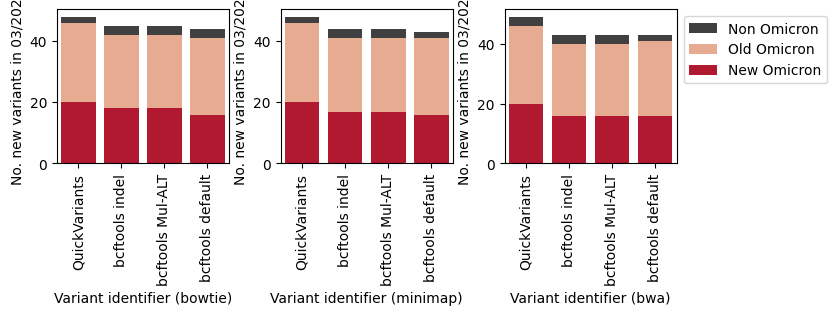

In [85]:
palette_set = {
    'New Omicron':'#ca0020',
    'Old Omicron':'#f4a582',
    'Non Omicron':'#404040',

}
legend_order = [ 'Non Omicron', 'Old Omicron',
                'New Omicron']

fig, axs = plt.subplots(nrows=1,ncols = 3,figsize=(8,2))
fig.subplots_adjust(wspace = 0.3)
for i in range(0,len(toolset)):
    sns.barplot(data = allresult[allresult['tool']==toolset[i]],ax = axs[i],
                x='VCFer',y='Count total',hue='OM',palette=palette_set,dodge=False,hue_order = legend_order)
    axs[i].set_xlabel('Variant identifier (%s)'%(toolset[i])) 
    axs[i].set_ylabel('No. new variants in 03/2023')
    plt.sca(axs[i])
    plt.xticks(rotation=90)
    if i < len(toolset):
        axs[i].get_legend().remove()
plt.legend(bbox_to_anchor=(1.0, 1.0))   
plt.savefig('COVID_MGSW/SNP_model/merge/SNPsumMAF%s.pdf'%(MAL))


In [13]:
# MGSW INDEL
from scipy.stats import fisher_exact
total_genome = 29864
OMSNP = ['T11288','C11289','T11290','G11291','G11292','T11293','T11294','T11295','T11296','T21633','A21634','C21635','C21636','C21637','C21638','C21639','T21640','G21641','T21992','A21993','T21994','G29734','A29735','G29736','G29737','C29738','C29739','A29740','C29741','G29742','C29743','G29744','G29745','A29746','G29747','T29748','A29749','C29750','G29751','A29752','T29753','C29754','G29755','A29756','G29757','T29758','G29759',
'T11288','C11289','T11290','G11291','G11292','T11293','T11294','T11295','T11296','T21633','A21634','C21635','C21636','C21637','C21638','C21639','T21640','G21641','T21765','A21766','C21767','A21768','T21769','G21770','G29734','A29735','G29736','G29737','C29738','C29739','A29740','C29741','G29742','C29743','G29744','G29745','A29746','G29747','T29748','A29749','C29750','G29751','A29752','T29753','C29754','G29755','A29756','G29757','T29758','G29759',
'A1688','T1689','T1690','T11288','C11289','T11290','G11291','G11292','T11293','T11294','T11295','T11296','T21633','A21634','C21635','C21636','C21637','C21638','C21639','T21640','G21641','T21765','A21766','C21767','A21768','T21769','G21770','G29734','A29735','G29736','G29737','C29738','C29739','A29740','C29741','G29742','C29743','G29744','G29745','A29746','G29747','T29748','A29749','C29750','G29751','A29752','T29753','C29754','G29755','A29756','G29757','T29758','G29759']
OMSNP = list(set(OMSNP))
OMoldSNP = ['T11288','C11289','T11290','G11291','G11292','T11293','T11294','T11295','T11296',
            'T21633','A21634','C21635','C21636','C21637','C21638','C21639','T21640','G21641',
            'G28362','A28363','G28364','A28365','A28366','C28367','G28368','C28369','A28370',
            'G29734','A29735','G29736','G29737','C29738','C29739','A29740','C29741','G29742',
            'C29743','G29744','G29745','A29746','G29747','T29748','A29749','C29750','G29751',
            'A29752','T29753','C29754','G29755','A29756','G29757','T29758','G29759']
OMoldSNP = list(set(OMoldSNP))
print(OMoldSNP)
OMoldSNP = list(set(OMoldSNP))
OMSNP = [x for x in OMSNP if x not in OMoldSNP]
print(len(OMSNP),len(OMoldSNP))
print(len(OMSNP),OMSNP)
OMSNP = [x[1:] for x in OMSNP]
OMoldSNP = [x[1:] for x in OMoldSNP]
toolset = ['bowtie','minimap','bwa']
VCFerset = ['indel.flt','flt','bcfdefault.flt','mappersamtovcf.vcf.snp'] 
allresult = pd.DataFrame()
for tool in toolset:
    for VCFer in VCFerset:
        SNP1 = pd.read_csv('COVID_MGSW/SNP_model/merge/Main_2022_Jan1__ref.fasta.0.SNP.fasta.%s.%s.indel.vcf.filtered'%(tool,VCFer),sep='\t')
        SNP2 = pd.read_csv('COVID_MGSW/SNP_model/merge/Main_2022_Jan2__ref.fasta.0.SNP.fasta.%s.%s.indel.vcf.filtered'%(tool,VCFer),sep='\t')
        SNP3 = pd.read_csv('COVID_MGSW/SNP_model/merge/Main_2023_Mar1__ref.fasta.0.SNP.fasta.%s.%s.indel.vcf.filtered'%(tool,VCFer),sep='\t')
        SNP3new = SNP3[~SNP3['POS'].isin(SNP1['POS'])][~SNP3['POS'].isin(SNP2['POS'])]
        print(SNP3new.shape,SNP3.shape)
        SNP3new['SNP']=SNP3new['POS'].astype('str')
        SNP3new['OM'] = 'Non Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMSNP),'OM']='New Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMoldSNP),'OM']='Old Omicron'
        tempresult = pd.DataFrame(
        SNP3new.groupby('OM')['OM'].count()
        )
        tempresult.columns = ['Count']
        tempresult.reset_index(inplace=True)
        tempresult['tool']=tool
        tempresult['VCFer'] = VCFer.replace('mappersamtovcf','QuickVariants').replace('indel.flt.snp','bcftools indel').replace('bcfdefault.flt.snp','bcftools default').replace('flt.snp','bcftools Mul-ALT')
        tempresult['Count total'] = tempresult['Count']
        if tempresult[tempresult['OM']=='New Omicron'].shape[0] > 0:
            tempresult.loc[tempresult['OM']=='Old Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='New Omicron','Count total'])[0]
        if tempresult[tempresult['OM']=='Old Omicron'].shape[0] > 0:
            tempresult.loc[tempresult['OM']=='Non Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='Old Omicron','Count total'])[0]
        if tempresult[tempresult['OM']!='Non Omicron'].shape[0] > 0:
            NonOM = list(tempresult.loc[tempresult['OM']=='Non Omicron','Count'])[0]
            OM = sum(tempresult.loc[tempresult['OM']!='Non Omicron','Count'])
            data = [[NonOM, OM], [total_genome-NonOM, len(OMSNP)-OM]]
            # Perform Fisher's Exact Test
            odds_ratio, p_value = fisher_exact(data)
            tempresult['Odds']=odds_ratio
            tempresult['pvalue']=p_value
        allresult = allresult.append(tempresult)
allresult.to_csv('COVID_MGSW/SNP_model/merge/INDELsum0.2.txt',sep='\t',index=False)
allresult

['C11289', 'G21641', 'C29739', 'A28370', 'A29756', 'T11293', 'C21637', 'T21640', 'G29736', 'G28364', 'C28369', 'G29737', 'G29744', 'C21636', 'T29748', 'T11288', 'G29759', 'A29749', 'T29753', 'G11291', 'C28367', 'G29757', 'A29740', 'T21633', 'T11294', 'G29755', 'G29751', 'C21638', 'A28365', 'G29745', 'T11295', 'T11296', 'C21635', 'A28366', 'C29754', 'C29738', 'C29750', 'A29746', 'T11290', 'G29747', 'G28368', 'G11292', 'C29743', 'G28362', 'A21634', 'C29741', 'T29758', 'A29735', 'G29742', 'G29734', 'C21639', 'A29752', 'A28363']
12 53
12 ['A1688', 'G21770', 'T1689', 'T21994', 'T21992', 'T21769', 'T21765', 'A21993', 'A21766', 'T1690', 'C21767', 'A21768']
(0, 7) (0, 7)
(0, 7) (0, 7)
(0, 7) (0, 7)
(4, 7) (5, 7)
(0, 7) (0, 7)
(0, 7) (0, 7)
(0, 7) (0, 7)
(4, 7) (5, 7)
(0, 7) (0, 7)
(0, 7) (0, 7)
(0, 7) (0, 7)
(4, 7) (5, 7)


,OM,Count,tool,VCFer,Count total,Odds,pvalue
0,Non Omicron,1,bowtie,QuickVariants.vcf.snp,4,0.0001,1.979758e-10
1,Old Omicron,3,bowtie,QuickVariants.vcf.snp,3,0.0001,1.979758e-10
0,Non Omicron,1,minimap,QuickVariants.vcf.snp,4,0.0001,1.979758e-10
1,Old Omicron,3,minimap,QuickVariants.vcf.snp,3,0.0001,1.979758e-10
0,Non Omicron,1,bwa,QuickVariants.vcf.snp,4,0.0001,1.979758e-10
1,Old Omicron,3,bwa,QuickVariants.vcf.snp,3,0.0001,1.979758e-10


In [12]:
SNP3new#0.2

,CHR,POS,REF,INDEL,Depth,Total_depth,Compare,SNP,OM
0,MN908947.3,11288,TCTGGTTTT,NaN,790.055556,790.555556,FP_diffPOS,11288,Old Omicron
1,MN908947.3,21633,TACCCCCTG,NaN,1289.055556,1289.166667,FP_diffPOS,21633,Old Omicron
2,MN908947.3,21991,TTA,NaN,5205.833333,5243.500000,FP_diffPOS,21991,Non Omicron
4,MN908947.3,29734,GAGGCCACGCGGAGTACGATCGAGTG,NaN,2464.384615,2464.730769,FP_diffPOS,29734,Old Omicron


In [14]:
# MGSW INDEL
from scipy.stats import fisher_exact
total_genome = 29864
toolset = ['bowtie','minimap','bwa']
VCFerset = ['indel.flt','flt','bcfdefault.flt','mappersamtovcf.vcf.snp'] 
allresult = pd.DataFrame()
for tool in toolset:
    for VCFer in VCFerset:
        SNP1 = pd.read_csv('COVID_MGSW/SNP_model/merge/Main_2022_Jan1__ref.fasta.0.SNP.fasta.%s.%s.indel.vcf.filtered'%(tool,VCFer),sep='\t')
        SNP2 = pd.read_csv('COVID_MGSW/SNP_model/merge/Main_2022_Jan2__ref.fasta.0.SNP.fasta.%s.%s.indel.vcf.filtered'%(tool,VCFer),sep='\t')
        SNP3 = pd.read_csv('COVID_MGSW/SNP_model/merge/Main_2023_Mar1__ref.fasta.0.SNP.fasta.%s.%s.indel.vcf.filtered'%(tool,VCFer),sep='\t')
        SNP3new = SNP1#SNP3[~SNP3['POS'].isin(SNP1['POS'])][~SNP3['POS'].isin(SNP2['POS'])]
        SNP3new = SNP3new.append(SNP2)
        SNP3new['SNP']=SNP3new['POS'].astype('str')
        SNP3new = SNP3new.drop_duplicates('SNP')
        print(SNP3new.shape,SNP1.shape)
        SNP3new['OM'] = 'Non Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMSNP),'OM']='New Omicron'
        SNP3new.loc[SNP3new['SNP'].isin(OMoldSNP),'OM']='Old Omicron'
        tempresult = pd.DataFrame(
        SNP3new.groupby('OM')['OM'].count()
        )
        tempresult.columns = ['Count']
        tempresult.reset_index(inplace=True)
        tempresult['tool']=tool
        tempresult['VCFer'] = VCFer.replace('mappersamtovcf','QuickVariants').replace('indel.flt.snp','bcftools indel').replace('bcfdefault.flt.snp','bcftools default').replace('flt.snp','bcftools Mul-ALT')
        tempresult['Count total'] = tempresult['Count']
        if tempresult[tempresult['OM']=='New Omicron'].shape[0] > 0:
            tempresult.loc[tempresult['OM']=='Old Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='New Omicron','Count total'])[0]
        if tempresult[tempresult['OM']=='Old Omicron'].shape[0] > 0:
            tempresult.loc[tempresult['OM']=='Non Omicron','Count total'] += list(tempresult.loc[tempresult['OM']=='Old Omicron','Count total'])[0]
        if tempresult[tempresult['OM']!='Non Omicron'].shape[0] > 0:
            NonOM = list(tempresult.loc[tempresult['OM']=='Non Omicron','Count'])[0]
            OM = sum(tempresult.loc[tempresult['OM']!='Non Omicron','Count'])
            data = [[NonOM, OM], [total_genome-NonOM, len(OMSNP)-OM]]
            # Perform Fisher's Exact Test
            odds_ratio, p_value = fisher_exact(data)
            tempresult['Odds']=odds_ratio
            tempresult['pvalue']=p_value
        allresult = allresult.append(tempresult)
allresult.to_csv('COVID_MGSW/SNP_model/merge/INDELsumtime00.2.txt',sep='\t',index=False)
allresult

(0, 8) (0, 7)
(0, 8) (0, 7)
(1, 8) (0, 7)
(10, 8) (9, 7)
(1, 8) (0, 7)
(1, 8) (0, 7)
(1, 8) (0, 7)
(10, 8) (9, 7)
(1, 8) (0, 7)
(1, 8) (0, 7)
(1, 8) (0, 7)
(10, 8) (9, 7)


,OM,Count,tool,VCFer,Count total,Odds,pvalue
0,Non Omicron,1,bowtie,bcfdefault.flt,1,NaN,NaN
0,New Omicron,1,bowtie,QuickVariants.vcf.snp,1,0.00134,0.000007
1,Non Omicron,8,bowtie,QuickVariants.vcf.snp,10,0.00134,0.000007
2,Old Omicron,1,bowtie,QuickVariants.vcf.snp,2,0.00134,0.000007
0,Non Omicron,1,minimap,indel.flt,1,NaN,NaN
0,Non Omicron,1,minimap,flt,1,NaN,NaN
0,Non Omicron,1,minimap,bcfdefault.flt,1,NaN,NaN
0,New Omicron,1,minimap,QuickVariants.vcf.snp,1,0.00134,0.000007
1,Non Omicron,8,minimap,QuickVariants.vcf.snp,10,0.00134,0.000007
2,Old Omicron,1,minimap,QuickVariants.vcf.snp,2,0.00134,0.000007


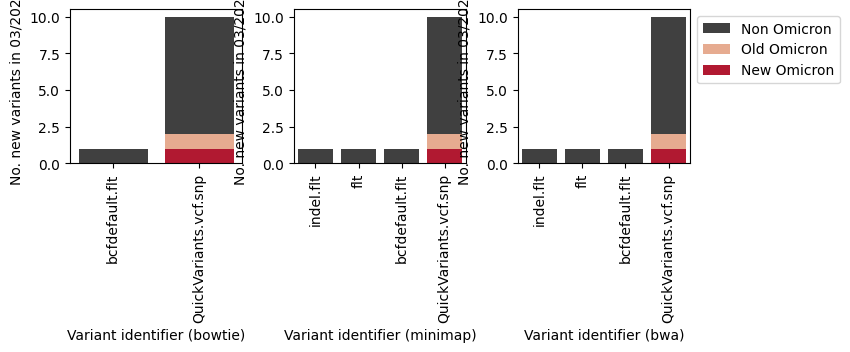

In [9]:
palette_set = {
    'New Omicron':'#ca0020',
    'Old Omicron':'#f4a582',
    'Non Omicron':'#404040',

}
legend_order = [ 'Non Omicron', 'Old Omicron',
                'New Omicron']

fig, axs = plt.subplots(nrows=1,ncols = 3,figsize=(8,2))
fig.subplots_adjust(wspace = 0.3)
for i in range(0,len(toolset)):
    sns.barplot(data = allresult[allresult['tool']==toolset[i]],ax = axs[i],
                x='VCFer',y='Count total',hue='OM',palette=palette_set,dodge=False,hue_order = legend_order)
    axs[i].set_xlabel('Variant identifier (%s)'%(toolset[i])) 
    axs[i].set_ylabel('No. new variants in 03/2023')
    plt.sca(axs[i])
    plt.xticks(rotation=90)
    if i < len(toolset):
        axs[i].get_legend().remove()
plt.legend(bbox_to_anchor=(1.0, 1.0))   
plt.savefig('COVID_MGSW/SNP_model/merge/INDELsumtime0MAF0.2.pdf')


In [10]:
SNP3new#0.2

,CHR,POS,REF,INDEL,Depth,Total_depth,Compare,SNP,OM
0,MN908947.3,6513,GTT,NaN,4705.000000,5377.333333,FP_diffPOS,6513,Non Omicron
1,MN908947.3,11283,GTTTGTCTG,NaN,2674.222222,2896.833333,FP_diffPOS,11283,Non Omicron
2,MN908947.3,13837,CATTTT,NaN,97.250000,438.833333,FP_diffPOS,13837,Non Omicron
3,MN908947.3,21765,TACATG,NaN,603.250000,603.250000,FP_diffPOS,21765,New Omicron
4,MN908947.3,21987,GTGTTTATT,NaN,10276.055556,10666.833333,FP_diffPOS,21987,Non Omicron
5,MN908947.3,22194,ATT,NaN,936.500000,1039.500000,FP_diffPOS,22194,Non Omicron
6,MN908947.3,22204,NaN,GAGCCAGAA,931.833333,1039.500000,FP_diffPOS,22204,Non Omicron
7,MN908947.3,22690,TTT,NaN,201.500000,810.833333,FP_diffPOS,22690,Non Omicron
8,MN908947.3,28362,GAGAACGCA,NaN,28883.944444,30337.944444,FP_diffPOS,28362,Old Omicron
2,MN908947.3,14216,CTGATAACAAAGC,NaN,131.615385,597.153846,FP_diffPOS,14216,Non Omicron
